# 1. Dimension Reduction Visualization Exercise

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2021)

### 1.1 Data
이번 실습에서 사용할 데이터는 손글씨 데이터   
데이터는 `sklearn.datasets`의 `load_digits`를 이용해 다운로드

In [2]:
from sklearn.datasets import load_digits

digits = load_digits()

In [3]:
data, target = digits["data"], digits["target"]
data[0], target[0]

(array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.]),
 0)

In [4]:
# 데이터는 8*8 모양의 이미지
data[0].shape

(64,)

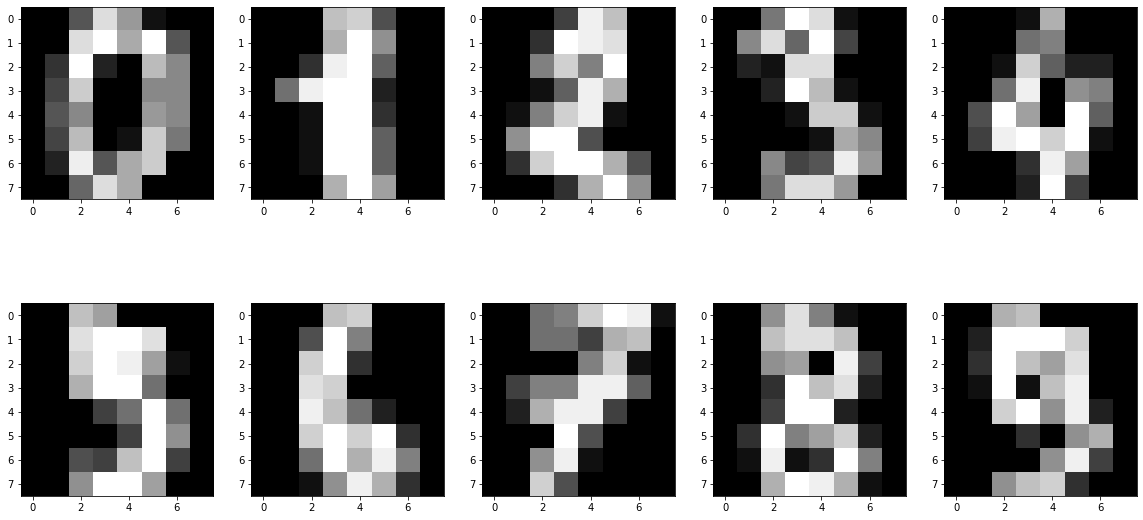

In [5]:
# 0~9까지 어떻게 쓰여있는지 확인
samples = data[:10].reshape(10, 8, 8)
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
for idx, sample in enumerate(samples):
    axes[idx//5, idx%5].imshow(sample, cmap="gray")

### 1.2 Data Normalization
데이터의 크기에 영향을 받는 PCA를 위해서 데이터를 정규화

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# 2. PCA
PCA는 `sklearn.decomposition`의 `PCA`로 사용

### 2.1 Learning

In [7]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(scaled_data)

PCA()

### 2.2 Described Variance
PCA는 첫 번째 주성분이 가장 크며 갈수록 작아짐

In [8]:
pca.explained_variance_

array([7.34477606e+00, 5.83549054e+00, 5.15396118e+00, 3.96623597e+00,
       2.96634520e+00, 2.57204442e+00, 2.40600941e+00, 2.06867355e+00,
       1.82993314e+00, 1.78951739e+00, 1.69784616e+00, 1.57287889e+00,
       1.38870781e+00, 1.35933609e+00, 1.32152536e+00, 1.16829176e+00,
       1.08368678e+00, 9.99778617e-01, 9.74382931e-01, 9.08912418e-01,
       8.22719264e-01, 7.76310139e-01, 7.11556753e-01, 6.45523648e-01,
       5.95273988e-01, 5.76501797e-01, 5.26731552e-01, 5.10636301e-01,
       4.86863813e-01, 4.55601071e-01, 4.42851552e-01, 4.22300863e-01,
       3.99106303e-01, 3.91101111e-01, 3.60945168e-01, 3.48603059e-01,
       3.19596300e-01, 2.94066271e-01, 2.76922851e-01, 2.58273004e-01,
       2.47830286e-01, 2.42356600e-01, 2.17581996e-01, 2.07995927e-01,
       2.00090902e-01, 1.89835165e-01, 1.76128942e-01, 1.68752359e-01,
       1.58184741e-01, 1.43114274e-01, 1.33210813e-01, 1.24263708e-01,
       1.19328984e-01, 1.11886547e-01, 1.02504338e-01, 9.84087608e-02,
      

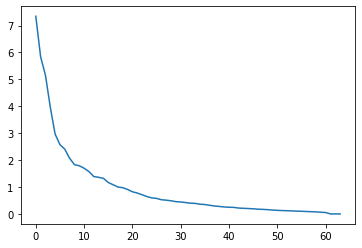

In [9]:
plt.plot(pca.explained_variance_)

### 2.3 Percentage of Variance Described
설명된 분산은 비율로도 표현 가능

In [10]:
pca.explained_variance_ratio_

array([1.20339161e-01, 9.56105440e-02, 8.44441489e-02, 6.49840791e-02,
       4.86015488e-02, 4.21411987e-02, 3.94208280e-02, 3.38938092e-02,
       2.99822101e-02, 2.93200255e-02, 2.78180546e-02, 2.57705509e-02,
       2.27530332e-02, 2.22717974e-02, 2.16522943e-02, 1.91416661e-02,
       1.77554709e-02, 1.63806927e-02, 1.59646017e-02, 1.48919119e-02,
       1.34796957e-02, 1.27193137e-02, 1.16583735e-02, 1.05764660e-02,
       9.75315947e-03, 9.44558990e-03, 8.63013827e-03, 8.36642854e-03,
       7.97693248e-03, 7.46471371e-03, 7.25582151e-03, 6.91911245e-03,
       6.53908536e-03, 6.40792574e-03, 5.91384112e-03, 5.71162405e-03,
       5.23636803e-03, 4.81807586e-03, 4.53719260e-03, 4.23162753e-03,
       4.06053070e-03, 3.97084808e-03, 3.56493303e-03, 3.40787181e-03,
       3.27835335e-03, 3.11032007e-03, 2.88575294e-03, 2.76489264e-03,
       2.59174941e-03, 2.34483006e-03, 2.18256858e-03, 2.03597635e-03,
       1.95512426e-03, 1.83318499e-03, 1.67946387e-03, 1.61236062e-03,
      

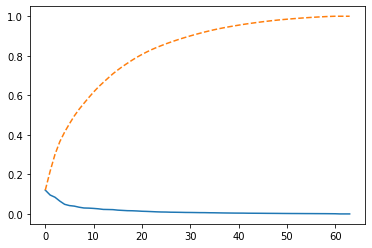

In [11]:
plt.plot(pca.explained_variance_ratio_)
plt.plot(pca.explained_variance_ratio_.cumsum(), linestyle="--")

# 3. Limited PCA
앞의 실습에서는 데이터의 모든 분산을 분리해서 사용.  
그런데 실제로 사용할 때는 개수를 지정하거나 설명되는 분산을 제한하는 방식으로 사용

### 3.1 How to use the ratio
`n_components` argument는 int와 float을 입력으로 받음  
0~1사이가 들어올 경우 설명된 분산이 해당 값에 도달할 때까지 주성분을 선택

In [12]:
ratio_pca = PCA(n_components=0.8)
ratio_pca.fit(scaled_data)

PCA(n_components=0.8)

In [13]:
ratio_pca.explained_variance_ratio_

array([0.12033916, 0.09561054, 0.08444415, 0.06498408, 0.04860155,
       0.0421412 , 0.03942083, 0.03389381, 0.02998221, 0.02932003,
       0.02781805, 0.02577055, 0.02275303, 0.0222718 , 0.02165229,
       0.01914167, 0.01775547, 0.01638069, 0.0159646 , 0.01489191,
       0.0134797 ])

In [14]:
ratio_pca.explained_variance_ratio_.cumsum()

array([0.12033916, 0.21594971, 0.30039385, 0.36537793, 0.41397948,
       0.45612068, 0.49554151, 0.52943532, 0.55941753, 0.58873755,
       0.61655561, 0.64232616, 0.66507919, 0.68735099, 0.70900328,
       0.72814495, 0.74590042, 0.76228111, 0.77824572, 0.79313763,
       0.80661732])

In [15]:
# 선택된 주성분 개수 확인
ratio_pca.n_components_

21

### 3.2 How to Use Counting
`n_components` argument는 int와 float을 입력으로 받음  
int 값으로 1보다 큰 값을 줄 경우에는 지정된 개수만큼의 주성분을 계산

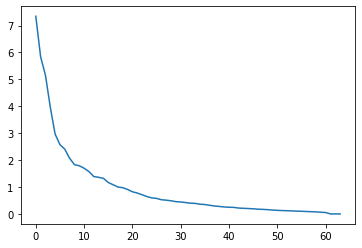

In [16]:
plt.plot(pca.explained_variance_)

In [17]:
# elbow point인 8개의 주성분만 선택
n_comp_pca = PCA(n_components=8)
n_comp_pca.fit(scaled_data)

PCA(n_components=8)

In [18]:
n_comp_pca.explained_variance_ratio_

array([0.12033916, 0.09561054, 0.08444414, 0.06498392, 0.04860127,
       0.04214067, 0.03941842, 0.03388898])

In [19]:
n_comp_pca.explained_variance_ratio_.cumsum()

array([0.12033916, 0.2159497 , 0.30039384, 0.36537776, 0.41397902,
       0.45611969, 0.49553812, 0.52942709])

In [20]:
n_comp_pca.n_components_

8

### 3.3 Visualization
사람이 인식할 수 있는 차원의 크기는 최대 3차원  
그래서 보통 2차원 또는 3차원으로 데이터를 축소한 후 시각화를 진행  
2차원으로 차원 축소는 주성분의 개수를 2개로, 3차원으로 차원 축소는 주성분의 개수를 3개로 설정

In [21]:
viz_pca = PCA(n_components=2)
viz_pca_latent = viz_pca.fit_transform(scaled_data)

In [22]:
def visualize_latent_space_with_label(latent):
    for label in np.unique(target):
        index = target == label
        component_1 = latent[index, 0]
        component_2 = latent[index, 1]
        plt.scatter(component_1, component_2, c=f"C{label}", label=label)
    plt.legend()

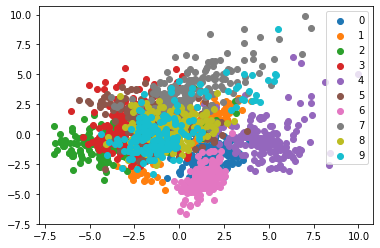

In [23]:
visualize_latent_space_with_label(viz_pca_latent)

# 4. LDA
LDA의 전체적인 과정은 PCA와 유사  
다만 학습할 때 label을 준다는 점만 다름

### 4.1 Learning

In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(scaled_data, target)

LinearDiscriminantAnalysis()

### 4.2 Described Variance
다만 LDA는 eigenvalue와 같이 분산의 크기를 나타내는 값은 없음  
설명된 분산의 크기만 확인 가능

In [25]:
lda.explained_variance_ratio_

array([0.28912041, 0.18262788, 0.16962345, 0.1167055 , 0.08301253,
       0.06565685, 0.04310127, 0.0293257 , 0.0208264 ])

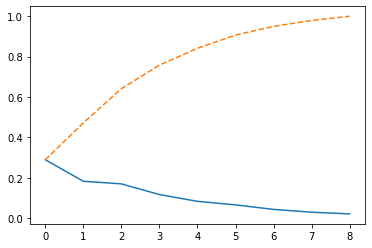

In [26]:
plt.plot(lda.explained_variance_ratio_)
plt.plot(lda.explained_variance_ratio_.cumsum(), linestyle="--")

### 4.3 Visualization

In [27]:
viz_lda = LinearDiscriminantAnalysis(n_components=2)
viz_lda_latent = viz_lda.fit_transform(scaled_data, target)

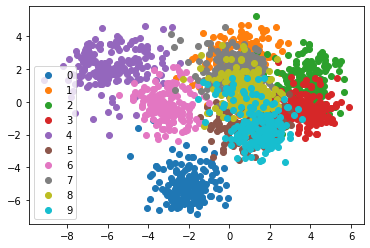

In [28]:
visualize_latent_space_with_label(viz_lda_latent)

# 5. T-SNE

In [29]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)

### 5.1 Visualization

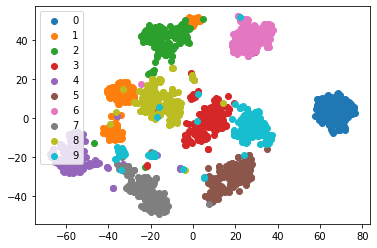

In [30]:
tsne_latent = tsne.fit_transform(scaled_data)

visualize_latent_space_with_label(tsne_latent)

# 6. Total

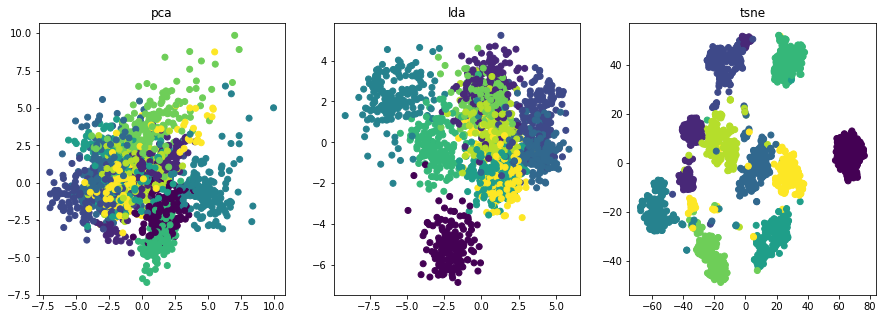

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
latents = [
    ("pca", viz_pca_latent),
    ("lda", viz_lda_latent),
    ("tsne", tsne_latent)
]
for idx, (name, latent) in enumerate(latents):
    ax = axes[idx]
    ax.scatter(latent[:, 0], latent[:, 1], c=target)
    ax.set_title(name)

# 7. Summary
> 차원(Dimesion)
- 공간 내 데이터 위치 나타내기 위한 필요한 축의 개수

> 차원과 변수
- 데이터가 n개 설명변수 가진다면 n차원 좌표 상에 표현 가능

> 차원의 저주(Curse of Dimensionality)
- 변수가 늘어나면서 차원의 커짐에 따라 발생 문제
- 필요한 데이터 수의 지수 함수적 증가로 인한 정보의 밀도 감소
- 공간을 설명하기 위한 데이터 부족(과적합, 성능감소)

> 차원축소(Dimensionality Reduction)
- 데이터 잘 설명할 수 있는 변수 개수(Latent Space)는 현재 변수 개수(Observation Space)보다 작을 수 있음
- 데이터 기반 잠재 공간 파악

> 차원축소 효과
- 차원의 저주 해결
- 연산량 감소
- 시각화 용이

> 차원축소 방법
- 변수선택(Feature Selection) : 원본 데이터의 변수 중 불필요 변수 제거방법
- 변수추출(Feature Extraction) : 원본 데이터의 변수들을 조합해 새로운 변수 생성
    - Principal Component Analysis (PCA)
    - Linear Discriminant Analysis (LDA)
    - t-distributed Stochastic Neighbor Embedding (t-SNE)
    
> Principal Component Analysis (PCA)
- 여러변수의 정보를 담고있는 주성분(Principal Component)이라는 새로운변수를 생성하는 차원축소기법
- 단순히 차원 줄이기 보다는 관측된 차원이 아닌 실제 데이터를 설명하는 차원 찾아 데이터 더 잘 이해하고자 함
- 분산을 최대로 보존하는 초평명 선택
    - 원본 데이터 셋과 투영된 초평면의 평균제곱거리를 최소화
    - 정보를 가장 적게 손실함
- 주성분 축 찾는 방법
    1. 데이터 표준화
        - 데이터 표준화 하지 않으면 값의 크기에 따라 공분산 영향 받음
    2. 공분산 행렬 생성
    3. 고유값 분해(Eigen Decomposition)
    4. K개벡터의새로운Basis
        - Scree Plot
        - Explained Variance
        
> PCA 장단점
- 장점
    - 변수간 상관관계 및 연관성 이용해 변수 생성
    - 차원 축소로 차원의 저주 해결 가능
- 단점
    - 데이터 선형성이 없다면 적용 불가능
    - 데이터 클래스 고려하지 않으므로 최대 분산 반향이 특징 구분을 좋게 한다고 보장 불가능
    - 주성분의 해석을 위한 도메인 지식 필요
    
> LDA(Linear Discriminant Analysis)
- 데이터의 분포 학습하여 분리 최적화하는 결정 경계 만들어 데이터 분류하는 모델
- LDA 목표는 클래스 간 분산을 크게, 클래 내의 분산 작게 한다

> PCA VS LDA
- PCA
    - 비지도 학습
    - 데이터 전체 분포 참고
    - 새로운 basis 설정
    - 그 축에 맞게 데이터 새롭게 projection
- LDA
    - 지도 학습
    - 지도적인 방법으로 Basis를 찾음
    - 그 축을 분리에 이용
    - 최적의 분리 완성한 뒤 projection
    
> 차원 축소를 위한 접근 방법
- PCA와 LDA는 Eigen Decomposition 기반 데이터를 새로운축에 선형으로 projection 시키는 과정

> t-SNE(t-Stochastic Neighbor Embedding)
- 고차원 데이터를 저차원 데이터로 거리 관계 유지하며 projection 하는 기법
- 학습방법
    1. 랜덤 순서로 나열
    2. 데이터 하나에 대해 동일 군집은 당기는 힘/ 다른 군집는 미는 힘 계산
    3. 데이터를 힘의 균형에 맞는 위치로 이동
    4. 모든 점들에 대해 2~3 과정 반복
- 장점
    - 직관적으로 데이터 구조를 시각화하여 확인 가능
- 단점
    - 거리 학습하여 계속 업데이트 하기 때문에 값이 매번 바뀜
    - PCA와 LDA와 다르게 결과를 변수로 사용 불가능
    - 데이터 수가 많아지면 시간이 오래 걸림